# <a id="2">Load packages</a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Parameters

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

IS_LOCAL = False

import os

if(IS_LOCAL):
    PATH=r"D:\datascience video\Datasets\Fashion MNIST"
else:
    PATH=r"D:\datascience video\Datasets\Fashion MNIST"
print(os.listdir(PATH))

['fashion-mnist_test.csv', 'fashion-mnist_train.csv', 't10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'train-labels-idx1-ubyte']


In [3]:
train_file = os.path.join(PATH, "fashion-mnist_train.csv")
test_file = os.path.join(PATH, "fashion-mnist_test.csv")

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)


# <a id="4">Data exploration</a>

In [4]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


## <a id="41">Class distribution</a>

Let's see how many number of images are in each class. We start with the train set.

### Train set images class distribution

In [5]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


The classes are equaly distributed in the train set (10% each). Let's check the same for the test set.    
Let's also plot the class distribution.



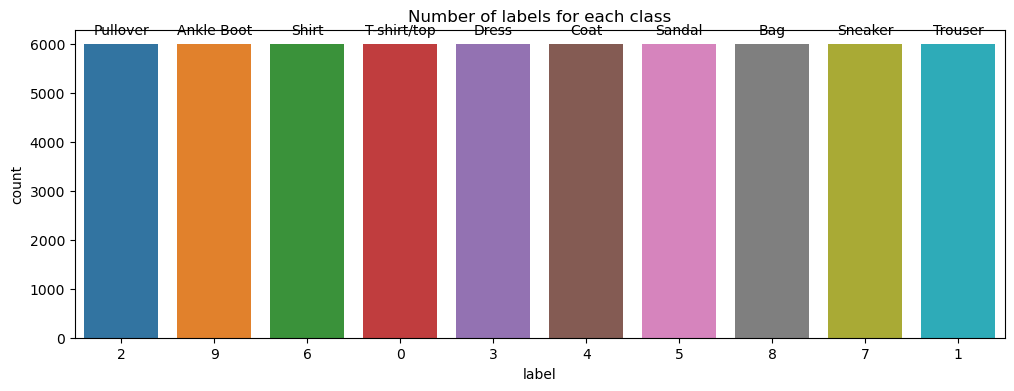

In [6]:
def plot_label_per_class(data, labels):
    f, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(x="label", data=data, order=data["label"].value_counts().index)
    g.set_title("Number of labels for each class")

    for p, label in zip(g.patches, data["label"].value_counts().index):
        g.annotate(labels[label], (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()

plot_label_per_class(train_data, labels)


### Test set images class distribution

In [7]:
get_classes_distribution(test_data)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


Also in the test set the 10 classes are equaly distributed (10% each).  

Lets' also plot the class distribution.

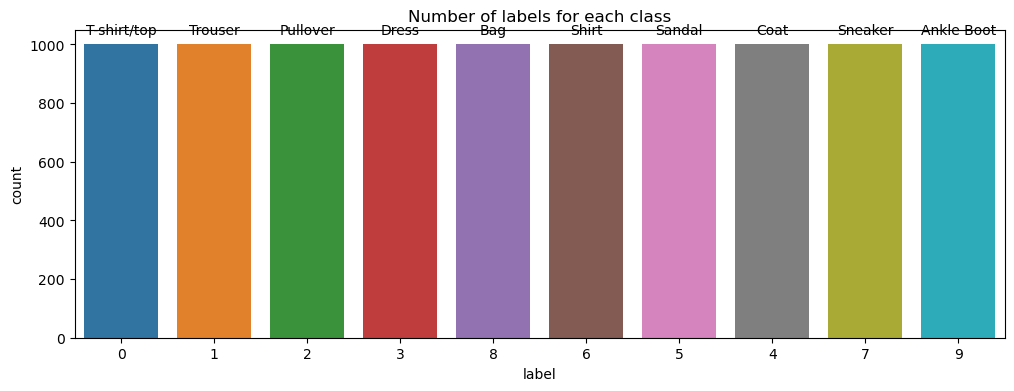

In [8]:
plot_label_per_class(test_data, labels)


## <a id="42">Sample images</a>

### Train set images

Let's plot some samples for the images.   
We add labels to the train set images, with the corresponding fashion item category.  

In [9]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in labels.keys():
        # Get four samples for each category
        samples = data[data["label"] == k].head(4)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


Let's now plot the images.   
The labels are shown above each image.

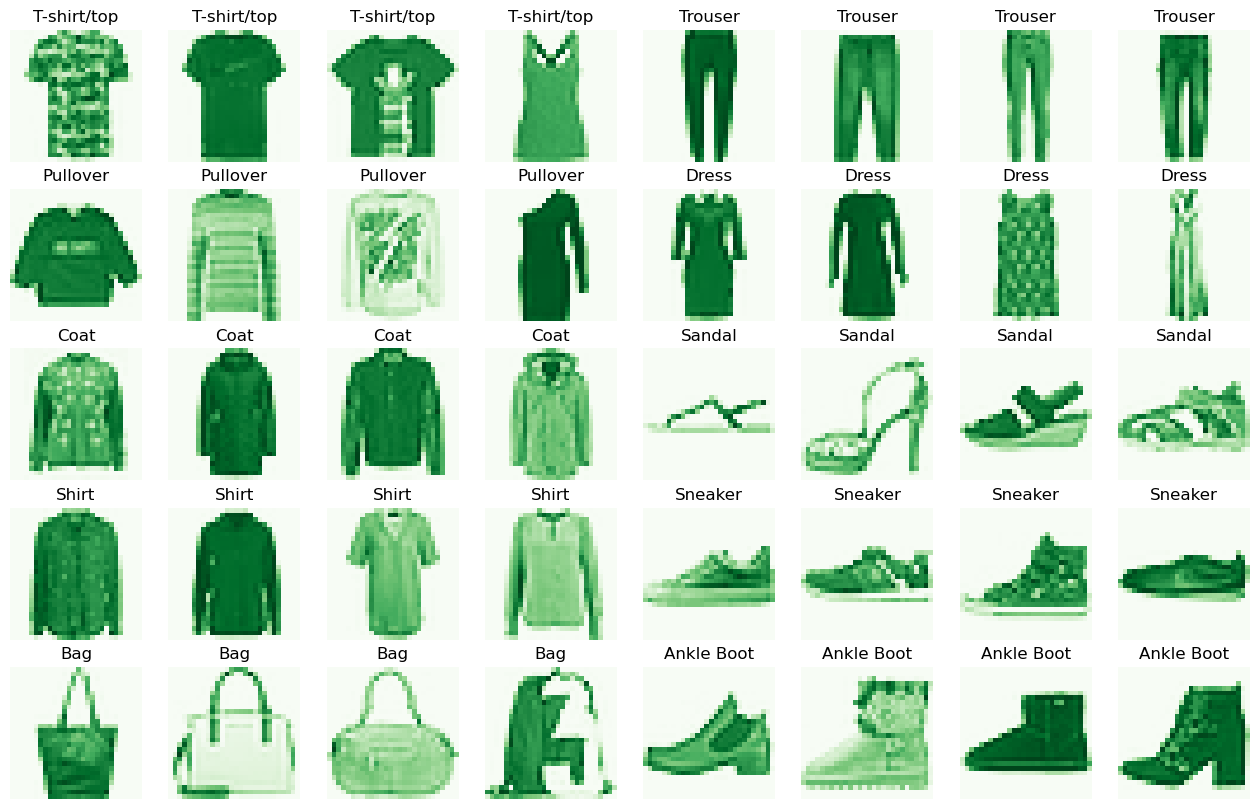

In [10]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Greens")

### Test set images

Let's plot now a selection of the test set images.  
Labels are as well added (they are known).  

Total number of sample images to plot:  40


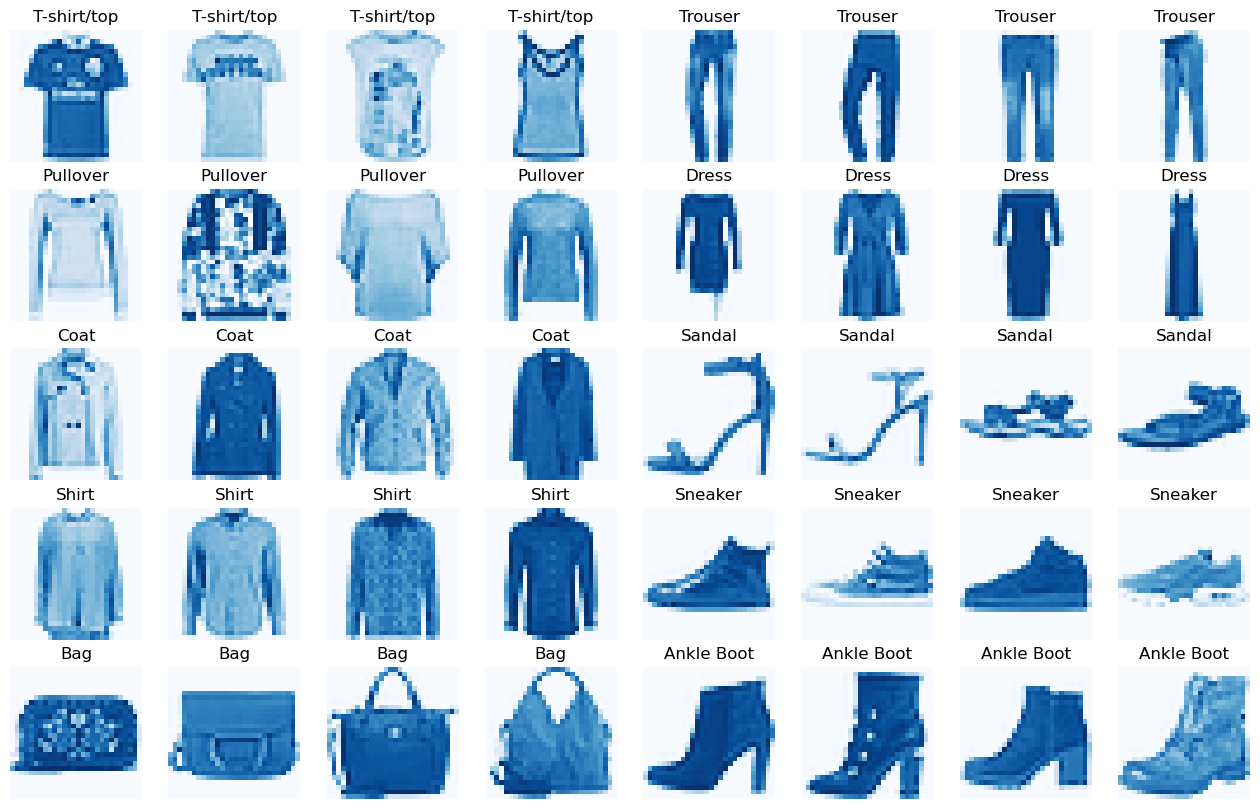

In [11]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

# <a id="5">Model</a>

We start with preparing the model.

## <a id="51">Prepare the model</a>

## Data preprocessing


In [12]:
from tensorflow.keras.utils import to_categorical
def data_preprocessing(raw):
    out_y = to_categorical(raw.label, NUM_CLASSES)
    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, IMG_ROWS, IMG_COLS, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y


We process both the train_data and the test_data

In [13]:
# prepare the data
X, y = data_preprocessing(train_data)
X_test, y_test = data_preprocessing(test_data)

## Split train in train and validation set

We further split the train set in train and validation set. The validation set will be 20% from the original train set, therefore the split will be train/validation of 0.8/0.2.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The dimmension of the processed train, validation and test set are as following:

In [15]:
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


Let's check the class inbalance for the rsulted training set.

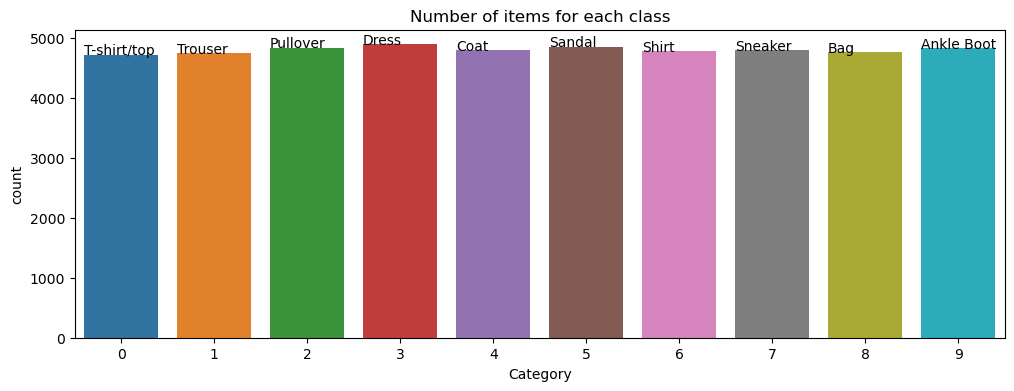

Dress               :   4891 or 10.189583333333333%
Sandal              :   4855 or 10.114583333333334%
Pullover            :   4836 or 10.075000000000001%
Ankle Boot          :   4827 or 10.05625%
Sneaker             :   4798 or 9.995833333333334%
Coat                :   4796 or 9.991666666666667%
Shirt               :   4779 or 9.95625%
Bag                 :   4757 or 9.910416666666666%
Trouser             :   4745 or 9.885416666666668%
T-shirt/top         :   4716 or 9.825000000000001%


In [16]:
def plot_count_per_class(yd, labels):
    ydf = pd.DataFrame({'label': yd})
    f, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(x='label', data=ydf, order=np.arange(0, 10))
    g.set_title("Number of items for each class")
    g.set_xlabel("Category")

    for p, label in zip(g.patches, np.arange(0, 10)):
        g.annotate(labels[label], (p.get_x(), p.get_height() + 0.1))

    plt.show()


def get_count_per_class(yd, labels):
    ydf = pd.DataFrame(yd)
    # Get the count for each label
    label_counts = ydf[0].value_counts()

    # Get total number of samples
    total_samples = len(yd)

    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

plot_count_per_class(np.argmax(y_train, axis=1), labels)

get_count_per_class(np.argmax(y_train, axis=1), labels)


And, as well, for the validation set.

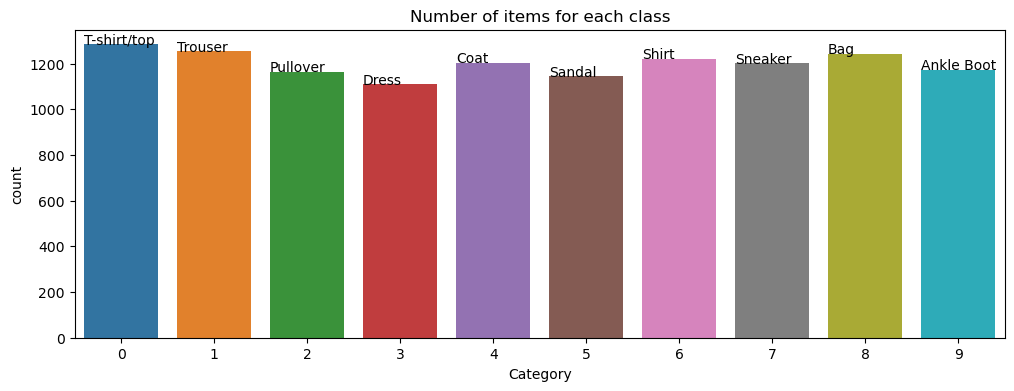

T-shirt/top         :   1284 or 10.7%
Trouser             :   1255 or 10.458333333333334%
Bag                 :   1243 or 10.358333333333333%
Shirt               :   1221 or 10.174999999999999%
Coat                :   1204 or 10.033333333333333%
Sneaker             :   1202 or 10.016666666666667%
Ankle Boot          :   1173 or 9.775%
Pullover            :   1164 or 9.700000000000001%
Sandal              :   1145 or 9.541666666666666%
Dress               :   1109 or 9.241666666666665%


In [17]:
plot_count_per_class(np.argmax(y_val, axis=1), labels)
get_count_per_class(np.argmax(y_val,axis=1), labels)

Both the train and validation set are unbalanced with respect of distribution of classes. 

In [18]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

### Inspect the model

Let's check the model we initialized.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

### Run the model

We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [20]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 10s 11ms/step - loss: 0.5324 - accuracy: 0.8075 - val_loss: 0.3674 - val_accuracy: 0.8717
Epoch 2/50
375/375 [==============================] - 5s 12ms/step - loss: 0.3334 - accuracy: 0.8774 - val_loss: 0.3300 - val_accuracy: 0.8828
Epoch 3/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2879 - accuracy: 0.8945 - val_loss: 0.2981 - val_accuracy: 0.8925
Epoch 4/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2550 - accuracy: 0.9057 - val_loss: 0.2686 - val_accuracy: 0.9040
Epoch 5/50
375/375 [==============================] - 5s 13ms/step - loss: 0.2283 - accuracy: 0.9163 - val_loss: 0.2694 - val_accuracy: 0.9047
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2102 - accuracy: 0.9231 - val_loss: 0.2838 - val_accuracy: 0.8992
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.1890 - accuracy: 0.9295 - val_loss: 0.2677 - val_accuracy: 0.906

## <a id="53">Test prediction accuracy</a>

We calculate the test loss and accuracy.

In [21]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6504247784614563
Test accuracy: 0.9143000245094299


## <a id="53">Validation accuracy and loss</a>

Let's plot the train and validation accuracy and loss, from the train history.

In [28]:
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']  # Adjust 'acc' to 'accuracy'
    val_acc = hist['val_accuracy']  # Adjust 'val_acc' to 'val_accuracy'
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1, len(acc) + 1))

    trace_ta = create_trace(epochs, acc, "Training accuracy", "Green")
    trace_va = create_trace(epochs, val_acc, "Validation accuracy", "Red")
    trace_tl = create_trace(epochs, loss, "Training loss", "Blue")
    trace_vl = create_trace(epochs, val_loss, "Validation loss", "Magenta")

    fig = make_subplots(rows=1, cols=2, subplot_titles=('Training and validation accuracy',
                                                        'Training and validation loss'))
    fig.append_trace(trace_ta, 1, 1)
    fig.append_trace(trace_va, 1, 1)
    fig.append_trace(trace_tl, 1, 2)
    fig.append_trace(trace_vl, 1, 2)
    fig['layout']['xaxis'].update(title='Epoch')
    fig['layout']['xaxis2'].update(title='Epoch')
    fig['layout']['yaxis'].update(title='Accuracy', range=[0, 1])
    fig['layout']['yaxis2'].update(title='Loss', range=[0, 1])

    iplot(fig, filename='accuracy-loss')


## <a id="55">Add Dropout layers to the model</a>
  


In [29]:
# Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

## <a id="56">Re-train the model</a>

Let's inspect first the model.

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)        

In [32]:
train_model = model.fit(X_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=1,
                  validation_data=(X_val, y_val))

Epoch 1/50
375/375 [==============================] - 5s 11ms/step - loss: 0.7362 - accuracy: 0.7228 - val_loss: 0.4582 - val_accuracy: 0.8372
Epoch 2/50
375/375 [==============================] - 4s 12ms/step - loss: 0.4826 - accuracy: 0.8216 - val_loss: 0.3770 - val_accuracy: 0.8643
Epoch 3/50
375/375 [==============================] - 4s 12ms/step - loss: 0.4129 - accuracy: 0.8478 - val_loss: 0.3318 - val_accuracy: 0.8803
Epoch 4/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3738 - accuracy: 0.8629 - val_loss: 0.3056 - val_accuracy: 0.8892
Epoch 5/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3492 - accuracy: 0.8729 - val_loss: 0.2895 - val_accuracy: 0.8961
Epoch 6/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3270 - accuracy: 0.8817 - val_loss: 0.2765 - val_accuracy: 0.9003
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.3118 - accuracy: 0.8861 - val_loss: 0.2634 - val_accuracy: 0.9030

## <a id="57">Prediction accuracy with the new model</a>

Let's re-evaluate the prediction accuracy with the new model.

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1958741992712021
Test accuracy: 0.9286999702453613


In [47]:
import numpy as np
predicted_probs = model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=-1)
predicted_labels = [labels[i] for i in predicted_classes]
y_true = test_data.iloc[:, 0]

In [36]:
p = predicted_classes[:10000]
y = y_true[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [37]:
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9287
Incorrect predicted classes: 713


In [38]:
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(NUM_CLASSES)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.87      0.90      0.89      1000
    Class 1 (Trouser) :       1.00      0.99      0.99      1000
   Class 2 (Pullover) :       0.88      0.89      0.89      1000
      Class 3 (Dress) :       0.90      0.96      0.93      1000
       Class 4 (Coat) :       0.91      0.88      0.90      1000
     Class 5 (Sandal) :       0.99      0.98      0.98      1000
      Class 6 (Shirt) :       0.82      0.76      0.79      1000
    Class 7 (Sneaker) :       0.97      0.95      0.96      1000
        Class 8 (Bag) :       0.99      0.98      0.99      1000
 Class 9 (Ankle Boot) :       0.96      0.98      0.97      1000

               accuracy                           0.93     10000
              macro avg       0.93      0.93      0.93     10000
           weighted avg       0.93      0.93      0.93     10000



# <a id="6">Visualize classified images</a>

## <a id="61">Correctly classified images</a>


We visualize few images correctly classified.

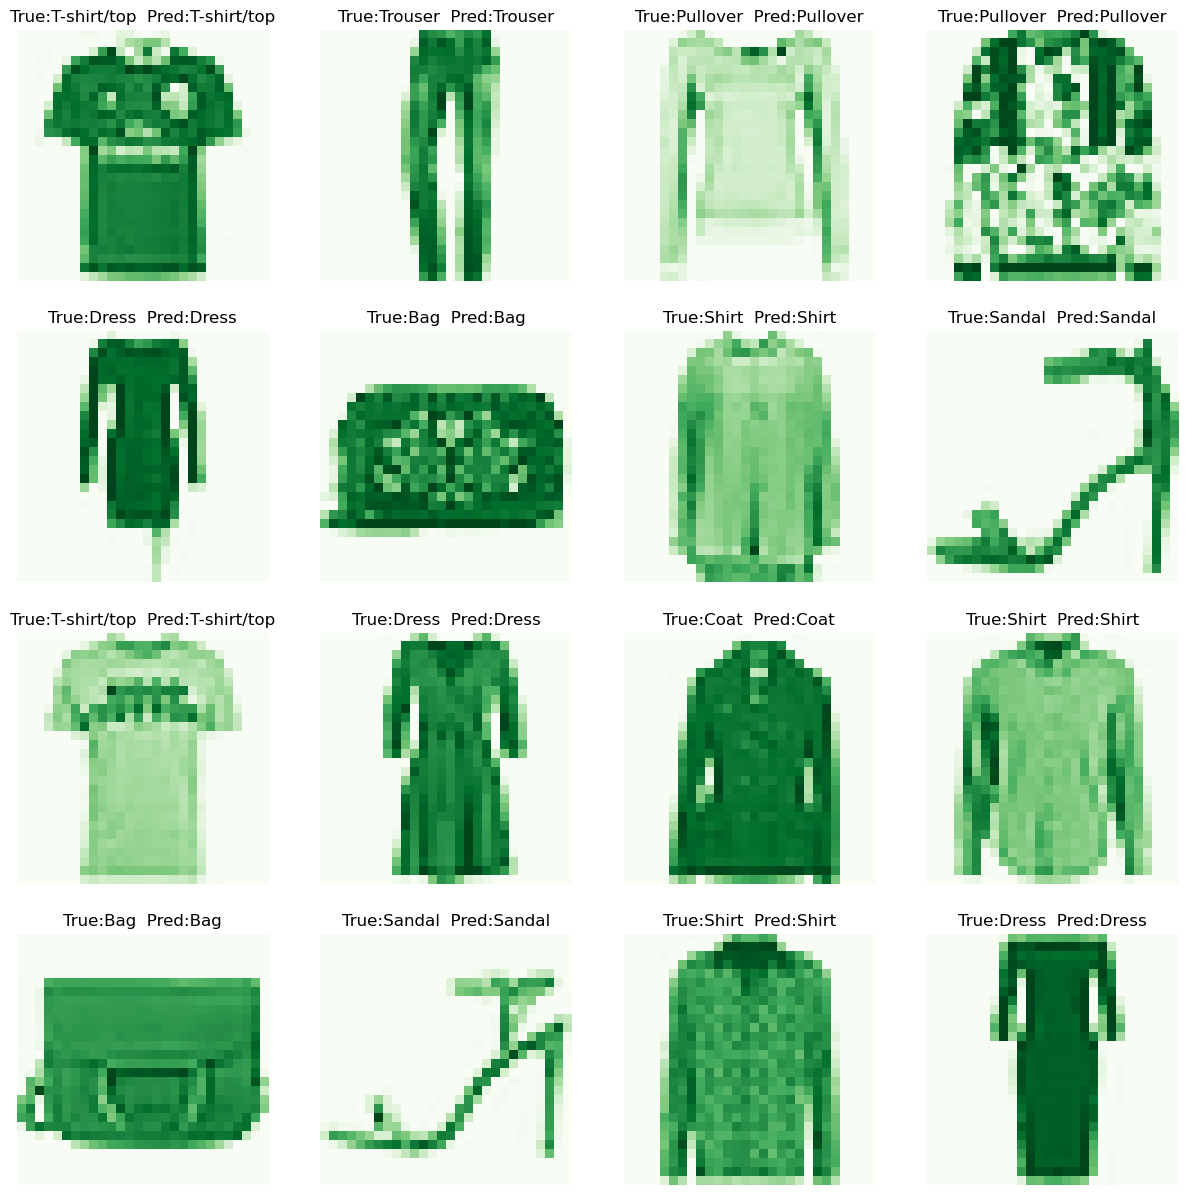

In [39]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(IMG_ROWS,IMG_COLS), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true[indx]],labels[predicted_classes[indx]]))
    plt.show()    
    
plot_images(correct, "Greens")

## <a id="62">Incorrectly classified images</a>

Let's see also few images incorrectly classified.

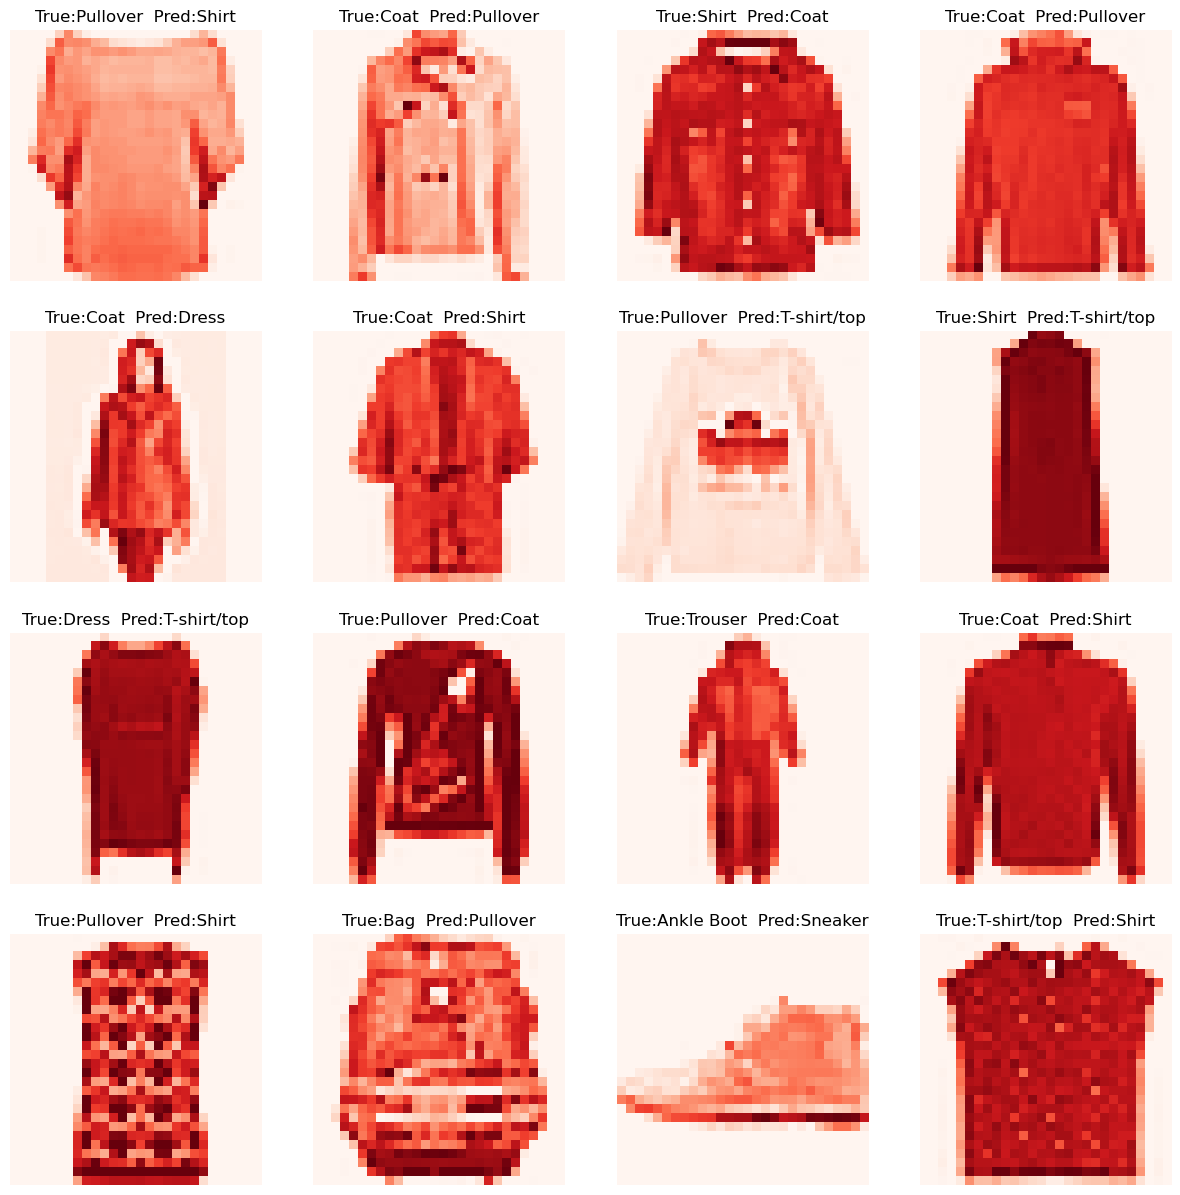

In [40]:
plot_images(incorrect, "Reds")

In [45]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = r'C:\Users\Asus\Downloads\bag.jpg'  

img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")  
img_array = image.img_to_array(img)  
img_array = img_array.reshape(1, 28, 28, 1)  

img_array = img_array / 255.0  

predicted_probs = model.predict(img_array)  
predicted_class_index = np.argmax(predicted_probs, axis=-1) 
predicted_class_label = labels[predicted_class_index[0]]  
print("Predicted class:", predicted_class_label)

Predicted class: Bag
